EXERCICE 1 : CRÉATION DES DONNÉES

Aperçu des données :
            Temperature   Humidity
Date                              
2022-01-01    23.493428  66.707875
2022-01-02    22.439229  88.896676
2022-01-03    24.226829  60.364634
2022-01-04    26.193077  89.096365
2022-01-05    22.894083  61.294797


EXERCICE 2 : ANALYSE DES DONNÉES

Statistiques descriptives :
       Temperature    Humidity
count   365.000000  365.000000
mean     22.519893   75.043654
std       8.960172    8.682426
min       3.742121   60.138961
25%      14.233542   67.378732
50%      22.894083   75.102518
75%      30.687345   82.447791
max      39.035937   89.991530

Température maximale : 39.04°C le 2022-04-24
Humidité maximale : 89.99% le 2022-03-05

EXERCICE 3 : FONCTIONS DE FENÊTRE


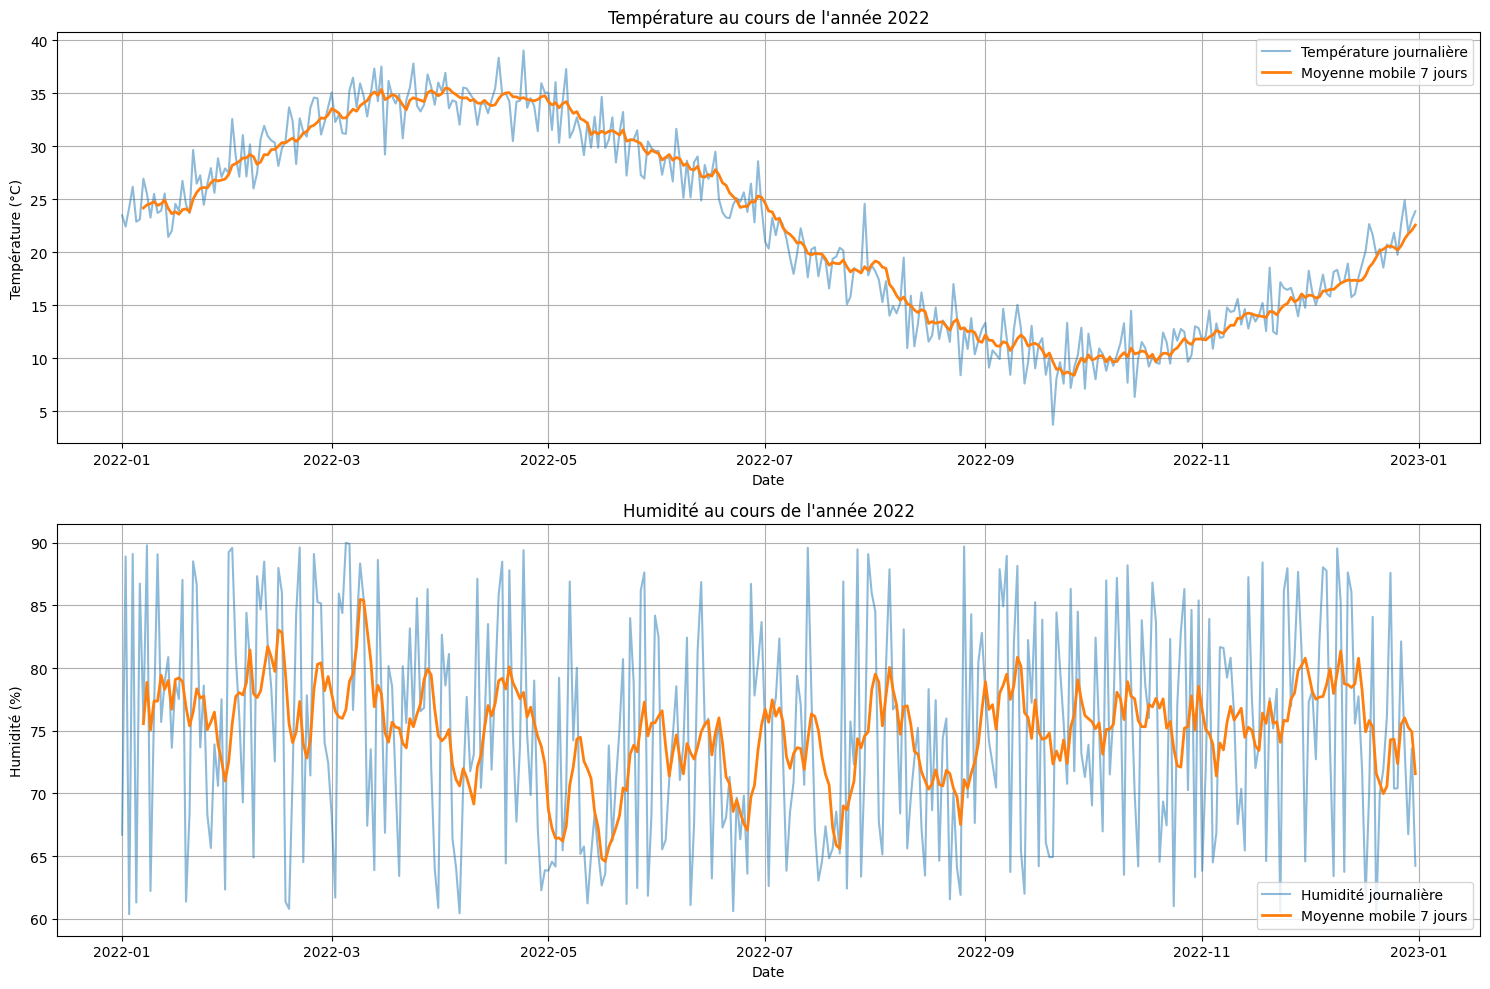

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Création des données
print("EXERCICE 1 : CRÉATION DES DONNÉES")

# Génération de la plage de dates
dates = pd.date_range(start='2022-01-01', end='2022-12-31', freq='D')

# Simulation des données de température et d'humidité
np.random.seed(42)  # Pour la reproductibilité

# Création d'une tendance saisonnière pour la température
t = np.linspace(0, 2*np.pi, len(dates))
temperature_trend = 22.5 + 12.5 * np.sin(t)  # Moyenne de 22.5°C avec amplitude de 12.5°C
temperature = temperature_trend + np.random.normal(0, 2, len(dates))

# Simulation de l'humidité
humidity = 60 + 30 * np.random.random(len(dates))

# Création du DataFrame
df = pd.DataFrame({
    'Date': dates,
    'Temperature': temperature,
    'Humidity': humidity
})
df.set_index('Date', inplace=True)

print("\nAperçu des données :")
print(df.head())
print("\n")

# 2. Analyse des données
print("EXERCICE 2 : ANALYSE DES DONNÉES")

# Statistiques descriptives
stats = df.describe()
print("\nStatistiques descriptives :")
print(stats)

# Identification des dates avec valeurs maximales
max_temp_date = df['Temperature'].idxmax()
max_humid_date = df['Humidity'].idxmax()

print(f"\nTempérature maximale : {df['Temperature'].max():.2f}°C le {max_temp_date.strftime('%Y-%m-%d')}")
print(f"Humidité maximale : {df['Humidity'].max():.2f}% le {max_humid_date.strftime('%Y-%m-%d')}")

# 3. Fonctions de fenêtre
print("\nEXERCICE 3 : FONCTIONS DE FENÊTRE")

# Calcul des moyennes mobiles
rolling_temp = df['Temperature'].rolling(window=7).mean()
rolling_humid = df['Humidity'].rolling(window=7).mean()

# Création des graphiques
plt.figure(figsize=(15, 10))

# Graphique de température
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Temperature'], label='Température journalière', alpha=0.5)
plt.plot(df.index, rolling_temp, label='Moyenne mobile 7 jours', linewidth=2)
plt.title('Température au cours de l\'année 2022')
plt.xlabel('Date')
plt.ylabel('Température (°C)')
plt.legend()
plt.grid(True)

# Graphique d'humidité
plt.subplot(2, 1, 2)
plt.plot(df.index, df['Humidity'], label='Humidité journalière', alpha=0.5)
plt.plot(df.index, rolling_humid, label='Moyenne mobile 7 jours', linewidth=2)
plt.title('Humidité au cours de l\'année 2022')
plt.xlabel('Date')
plt.ylabel('Humidité (%)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
